<a href="https://colab.research.google.com/github/Dipatria/artificial_intelligence/blob/master/machine_learning/Ward_Hierarchical_Clustering_for_Ishihara_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ward Hierarchical Clustering for Ishihara Test

## Import Image

In [0]:
import os
img_dir = '/tmp/nst'
if not os.path.exists(img_dir):
    os.makedirs(img_dir)
!wget --quiet -P /tmp/nst/ https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Ishihara_9.png/800px-Ishihara_9.png
!wget --quiet -P /tmp/nst/  https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Ishihara_11.PNG/800px-Ishihara_11.PNG

## Import Library

We use Image to load image. pyplot to plot image from array. numpy to change image into an array and change the shape. KMeans as learning model. 

In [0]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering


%matplotlib inline

## Convert RGBA to RGB
Use this function if the image has alpha channel(ie. png format). If your image already has RGB channel, use this line:

```
Image.open(img_path)
```



In [0]:
def rgba_to_rgb(image):
    """
    Source: http://stackoverflow.com/a/9459208/284318
    """
    color=(255, 255, 255)
    image.load()  # needed for split()
    background = Image.new('RGB', image.size, color)
    background.paste(image, mask=image.split()[3])  # 3 is the alpha channel
    (width, height) = (background.width // 4, background.height // 4) # resize image to 25%
    bg_resize = background.resize((width,height))
    return bg_resize

In [0]:
img_path = '/tmp/nst/800px-Ishihara_9.png'
img_path2 = '/tmp/nst/800px-Ishihara_11.PNG'
image = rgba_to_rgb(Image.open(img_path2))

## Flatten Image
change 2D image into an 1D array with 3 channels

In [0]:
img_array = np.array(image)
shape = img_array.shape

img_flatten = np.reshape(img_array,(shape[0]*shape[1],shape[2]))

## Normalization

In [0]:
img_flatten = img_flatten/255

## Create Learning Model
We set number of clusters to 3; 2 clusters for image and 1 cluster for background.

In [0]:
clusters = 3
model = AgglomerativeClustering(n_clusters=clusters)
y_model = model.fit_predict(img_flatten)

## Show the result
Left   : original image

Right : generated image based on cluster

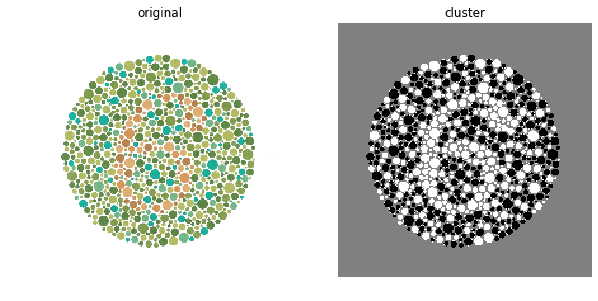

In [8]:
cluster_array = np.reshape(y_model, (shape[0], shape[1]))
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(image)
plt.title("original")
plt.axis('off')

plt.subplot(122)
plt.imshow(cluster_array, cmap='gray', vmin=0, vmax=clusters-1)
plt.title("cluster")
plt.axis('off')

plt.show()